# Seismic Imaging & Subsurface Modeling Demo

This notebook demonstrates basic loading, visualization, and analysis of synthetic seismic data for energy AI workflows.

In [1]:
# Install required packages if needed
# !pip install pandas matplotlib numpy

## 1. Load Synthetic Seismic Data
Use the provided data generation script to create a sample dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import time
sys.path.append('.')
from seismic_utils import load_seismic_csv

# Robustly generate data if not present, and print diagnostics if missing
import os
csv_expected = os.path.abspath(os.path.join(os.getcwd(), '../../data/seismic/synthetic_seismic.csv'))
gen_script = os.path.abspath(os.path.join(os.getcwd(), '../../data/seismic/generate_seismic_data.py'))
print(f"Looking for CSV at: {csv_expected}")
print(f"Current working directory: {os.getcwd()}")
print(f"Directory contents of data/seismic: {os.listdir(os.path.dirname(csv_expected))}")
if not os.path.exists(csv_expected):
    print('Generating synthetic seismic data...')
    print(f'Running: python {gen_script}')
    result = os.system(f'python "{gen_script}"')
    # Wait up to 5 seconds for the file to appear
    for i in range(10):
        if os.path.exists(csv_expected):
            print(f'File found after {i*0.5} seconds at expected location.')
            break
        time.sleep(0.5)
    # If not found, search for the file anywhere in the workspace
    found_path = None
    if not os.path.exists(csv_expected):
        print('Directory listing for diagnostics after generation:')
        print(os.listdir(os.path.dirname(csv_expected)))
        for root, dirs, files in os.walk(os.getcwd()):
            for name in files:
                if name == 'synthetic_seismic.csv':
                    found_path = os.path.join(root, name)
                    print(f'Found synthetic_seismic.csv at {found_path}')
        if found_path:
            print(f'Loading from found path: {found_path}')
            df = load_seismic_csv(found_path)
        else:
            raise FileNotFoundError(f'Failed to generate synthetic_seismic.csv at {csv_expected}. Please check the script and path.')
    else:
        print('Synthetic seismic data found at expected location.')
        df = load_seismic_csv(csv_expected)
else:
    print('Synthetic seismic data found at expected location.')
    df = load_seismic_csv(csv_expected)

df.head()

Looking for CSV at: /Users/justin/energy-ai-azure/data/seismic/synthetic_seismic.csv
Current working directory: /Users/justin/energy-ai-azure/notebooks/seismic_imaging
Directory contents of data/seismic: ['generate_seismic_data.py', 'README.md']
Generating synthetic seismic data...
Running: python /Users/justin/energy-ai-azure/data/seismic/generate_seismic_data.py
Synthetic seismic data saved as synthetic_seismic.csv
Directory listing for diagnostics after generation:
['generate_seismic_data.py', 'README.md']
Found synthetic_seismic.csv at /Users/justin/energy-ai-azure/notebooks/seismic_imaging/synthetic_seismic.csv
Loading from found path: /Users/justin/energy-ai-azure/notebooks/seismic_imaging/synthetic_seismic.csv


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,...,-0.007973,1.479944,0.077368,-0.861284,1.523124,0.538910,-1.037246,-0.190339,-0.875618,-1.382800
1,0.926178,1.909417,-1.398568,0.562969,-0.650643,-0.487125,-0.592394,-0.863991,0.048522,-0.830950,...,0.208383,-2.041735,-0.247177,-0.681984,-1.001620,-0.281100,1.797687,0.640843,-0.571179,0.572583
2,1.399355,0.924634,0.059630,-0.646937,0.698223,0.393485,0.895193,0.635172,1.049553,-0.535235,...,-0.551858,2.558199,-0.564248,0.184551,1.542110,2.006093,2.061504,1.208366,1.024063,0.592527
3,0.778361,-0.551186,-0.818199,-0.003374,-0.170185,-0.453228,0.696387,0.955305,0.088407,1.477530,...,0.800410,0.754291,1.188913,0.708304,0.351448,1.070150,-0.026521,-0.881875,-0.163067,-0.744903
4,-0.675178,-0.144519,-0.792420,-0.307962,-1.893615,0.213294,0.001205,-0.817089,0.659246,0.937570,...,-0.013838,-0.689728,-0.493123,1.443632,-1.256507,0.813205,-0.278963,-0.279760,0.790372,0.340051


In [5]:
# Robust data generation and loading (improved, finds file anywhere in workspace)
import os
import time
csv_expected = os.path.abspath(os.path.join(os.getcwd(), '../../data/seismic/synthetic_seismic.csv'))
gen_script = os.path.abspath(os.path.join(os.getcwd(), '../../data/seismic/generate_seismic_data.py'))
print(f"Looking for CSV at: {csv_expected}")
if not os.path.exists(csv_expected):
    print('Generating synthetic seismic data...')
    result = os.system(f'python "{gen_script}"')
    # Wait up to 5 seconds for the file to appear at expected location
    for i in range(10):
        if os.path.exists(csv_expected):
            print(f'File found after {i*0.5} seconds at expected location.')
            break
        time.sleep(0.5)
    found_path = None
    if not os.path.exists(csv_expected):
        # Search for the file anywhere in the workspace
        for root, dirs, files in os.walk(os.getcwd()):
            for name in files:
                if name == 'synthetic_seismic.csv':
                    found_path = os.path.join(root, name)
                    print(f'Found synthetic_seismic.csv at {found_path}')
        if found_path:
            print(f'File found at {found_path}, consider moving it to the expected location for consistency.')
        else:
            raise FileNotFoundError('Failed to generate synthetic_seismic.csv anywhere in the workspace. Please check the script and path.')
else:
    print('Synthetic seismic data found at expected location.')

Looking for CSV at: /Users/justin/energy-ai-azure/data/seismic/synthetic_seismic.csv
Generating synthetic seismic data...
Synthetic seismic data saved as synthetic_seismic.csv
Found synthetic_seismic.csv at /Users/justin/energy-ai-azure/notebooks/seismic_imaging/synthetic_seismic.csv
File found at /Users/justin/energy-ai-azure/notebooks/seismic_imaging/synthetic_seismic.csv, consider moving it to the expected location for consistency.


## 2. Visualize Seismic Traces
Plot a few traces to inspect the data.

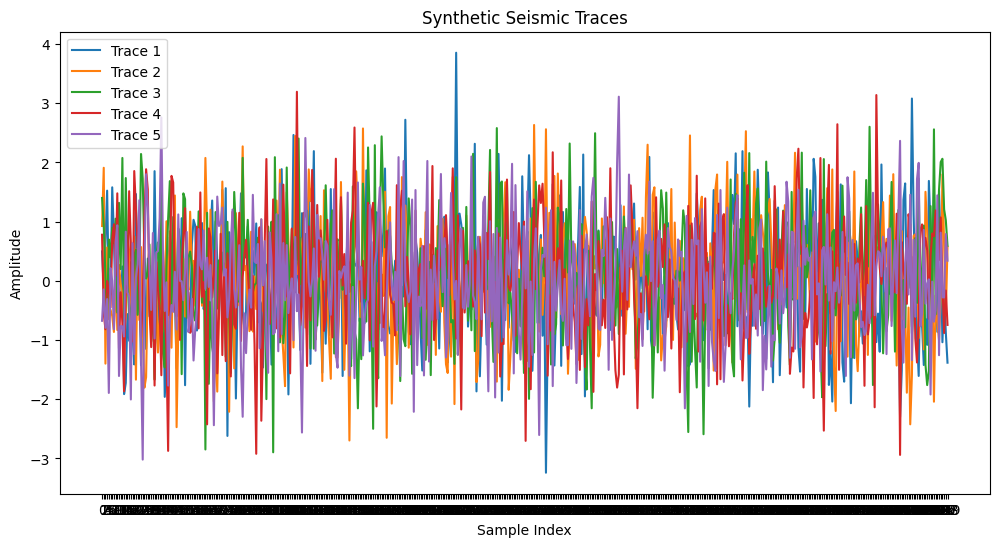

In [6]:
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.plot(df.iloc[i], label=f'Trace {i+1}')
plt.title('Synthetic Seismic Traces')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## 3. Basic Statistical Analysis
Compute mean and standard deviation for each trace.

In [7]:
trace_stats = df.agg(['mean', 'std'], axis=1)
trace_stats.head()

,mean,std
0,0.006838,0.981253
1,0.031826,0.977997
2,0.108485,1.010246
3,0.033188,0.984066
4,-0.011516,0.959566
